In [50]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython import display
from io import BytesIO
from time import sleep

In [82]:
def plotPercentileDistribution():
    display.clear_output(wait=True)

    percentiles = [0.100000,0.200000,0.300000,0.400000,0.500000,0.550000,0.600000,0.650000,0.700000,0.750000,0.775000,0.800000,0.825000,0.850000,0.875000,0.887500,0.900000,0.912500,0.925000,0.937500,0.943750,0.950000,0.956250,0.962500,0.968750,0.971875,0.975000,0.978125,0.981250,0.984375,0.985938,0.987500,0.989062,0.990625,0.992188,0.992969,0.993750,0.994531,0.995313,0.996094,0.996484,0.996875,0.997266,0.997656,0.998047,0.998242,0.998437,0.998633,0.998828,0.999023,0.999121,0.999219,0.999316,0.999414,0.999512,0.999561,0.999609,0.999658,0.999707,0.999756,0.999780,0.999805,0.999829,0.999854,0.999878,0.999890,0.999902,0.999915,0.999927,0.999939,0.999945,0.999951,0.999957,0.999963,0.999969,0.999973,0.999976,0.999979,0.999982,0.999985,0.999986,0.999988,0.999989,0.999991,0.999992,0.999993,0.999994,0.999995,0.999996,0.999997,0.999998]

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(8, 12))
    
    ax = ax1
    ax.title.set_text("Response time by percentile distribution for latest benchmark")
    ax.set_xlabel("Percentile (log scale)")
    ax.set_ylabel("Response time (milliseconds)")
    keys = [1.0/(1.0-(p)) for p in percentiles]
    ax.set_xscale("log")
    ax.xaxis.set_ticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000])
    ax.xaxis.set_ticklabels(["0%", "90%", "99%", "99.9%", "99.99%", "99.999%", "99.9999%", "99.99999%", "99.999999%"])
    ax.set_autoscalex_on(True)
    ax.set_xlim([1*0.7,1000000*1.3])
    df = pd.read_csv("latencies.csv")
    vals = df.quantile(percentiles)["latencyMs"].values
    ax.plot(keys, vals, label="Benchmark")
    # SLA line
    ax.step([1, 10000, 100000, 100000, 1000000], [100, 200, 200, 500, 500], where="post", label="SLA")
    ax.legend(frameon=False, loc="upper left")

    ax = ax2
    ax.title.set_text("Response times for latest benchmark")
    ax.set_xlabel("Elapsed time")
    ax.set_ylabel("Response time (milliseconds)")
    df = pd.read_csv("latencies.csv")
    vals = df["latencyMs"].groupby(df.index//(len(df)//500)).max().values
    ax.set_xticks([])
    ax.plot(vals, label="Benchmark 1")
    ax.legend(frameon=False, loc="upper left")
    
    ax = ax3
    ax.title.set_text("RPS hill climb")
    df = pd.read_csv("hillclimb.csv")
    ax.set_xlabel("Benchmark iteration")
    ax.set_ylabel("Requests/sec")
    ax.plot( df["rps"].values)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

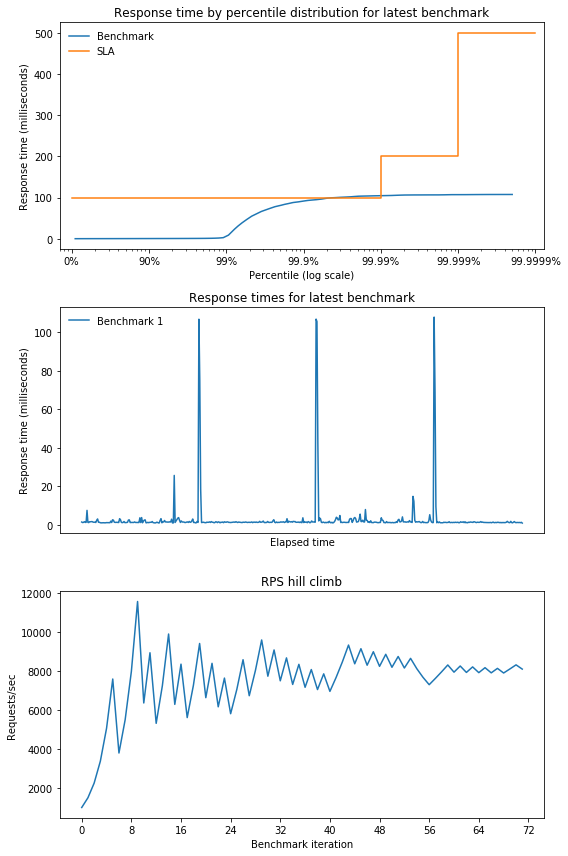

In [83]:
# This is meant to run continuously alongside Hlg to give a live dashboard of its progress
try:
    while True:
        plotPercentileDistribution()

        sleep(1)
except KeyboardInterrupt: pass